# 2020a_ForwardQG
This notebook, associated to the configuration file *config_2020a_ForwardQG.py*, runs a forward QG propagation from a NATL60 initial state

## Configuration file

In [1]:
path_config = 'config_2022a_ForwardQG'

In [2]:
import sys
sys.path.append('..')

In [3]:
from src import exp
config = exp.Exp(path_config)

name_experiment: 2022a_ForwardQG
saveoutputs: True
name_exp_save: 2022a_ForwardQG
path_save: ../outputs/2022a_ForwardQG
tmp_DA_path: ../scratch/2022a_ForwardQG
init_date: 2012-02-01 00:00:00
final_date: 2012-02-10 00:00:00
saveoutput_time_step: 1 day, 0:00:00
flag_plot: 4
name_lon: lon
name_lat: lat
name_time: time
assimilation_time_step: 1:00:00
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None

NAME_OBS is not set in the configuration file
NAME_BC is not set in the configuration file
NAME_OBSOP is not set in the configuration file
NAME_BASIS is not set in the configuration file
NAME_INV is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_FROM_FILE
path_init_grid: ../../data/2022a_mapping_HFdynamic/dc_ref_eval/2022a_SSH_mapping_CalXover_eval_2012-02-01.nc
name_init_lon: lon
name_init_lat: lat
name_init_var: [None]
subsampling: None



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_JAX
name_var: {'SSH': 'ssh'}
name_init_var: {'SSH': 'ssh'}
dir_model: None
multiscale: False
dtmodel: 1200
time_scheme: Euler
upwind: 3
upwind_adj: None
Reynolds: False
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81



## Inversion

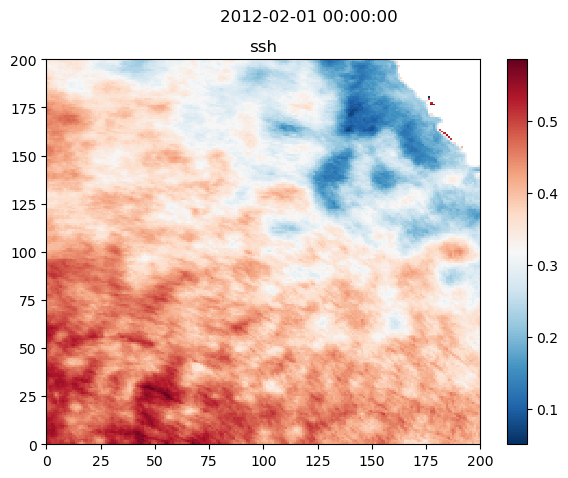

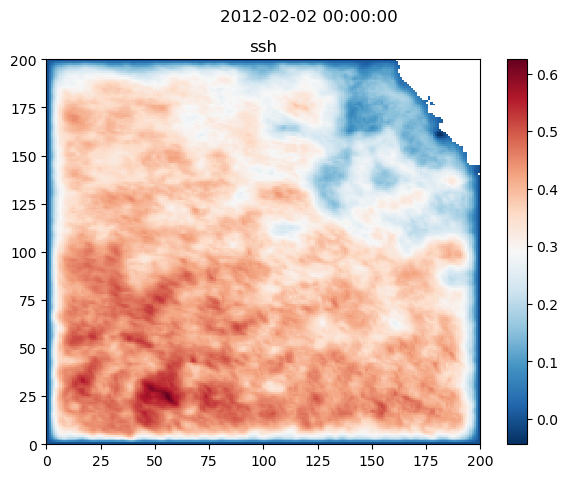

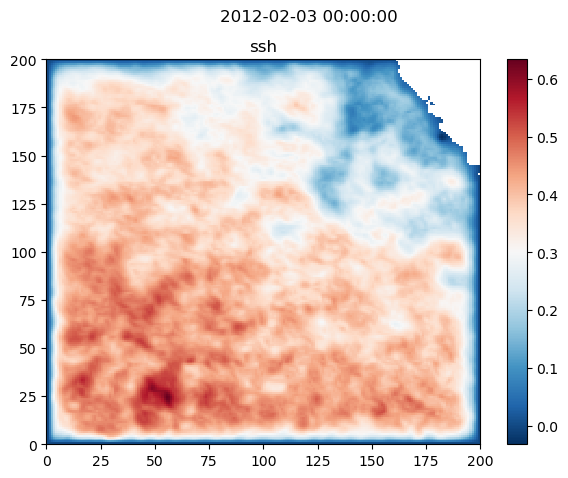

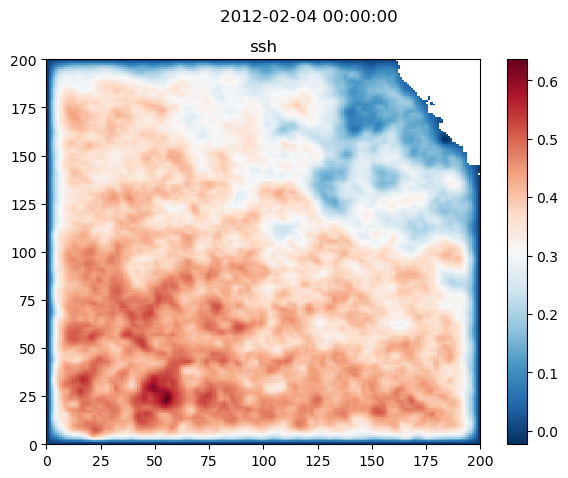

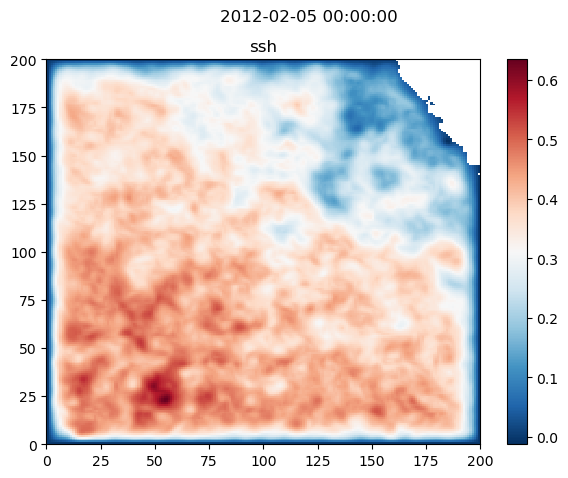

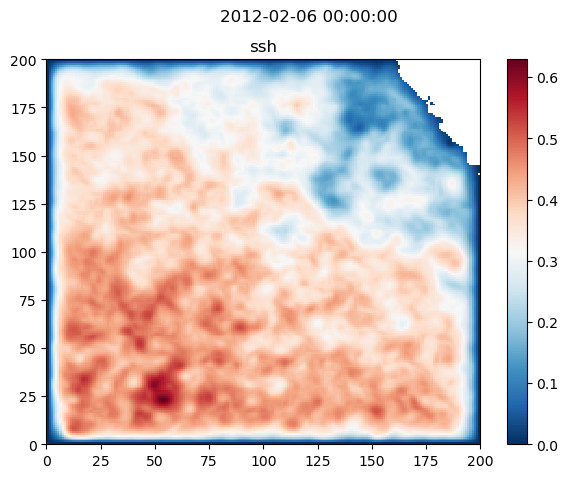

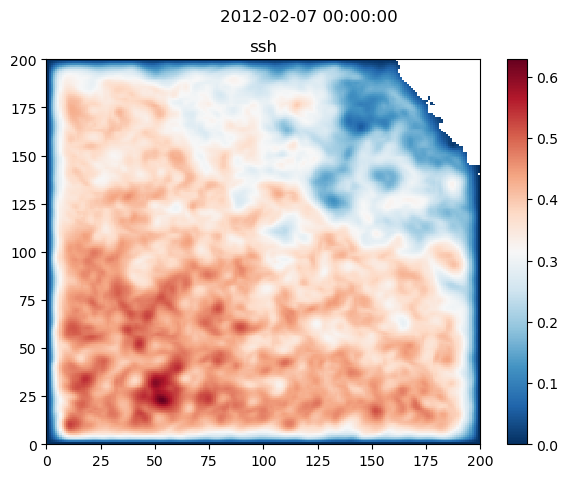

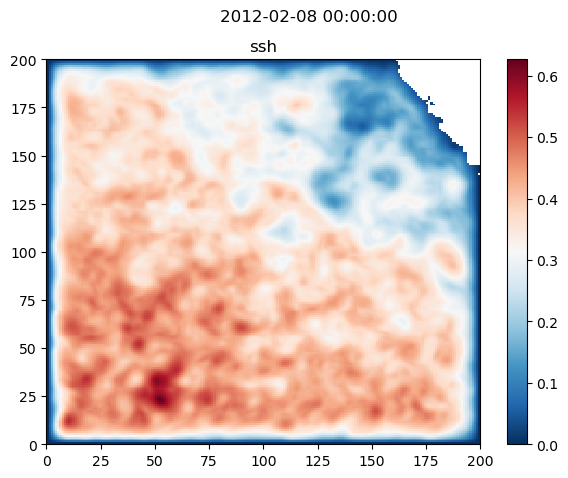

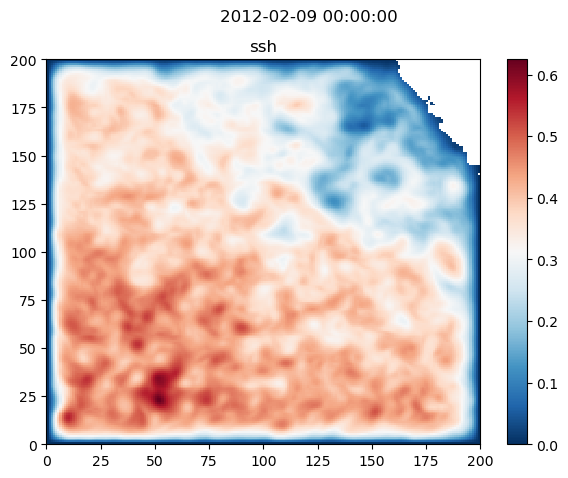

In [6]:
from src import inv as inv
inv.Inv(config,State,Model)

## Diagnostics

In [7]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: None
time_min: None
time_max: None
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: ../../data/2022a_mapping_HFdynamic/dc_ref_eval/2022a_SSH_mapping_CalXover_eval*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: ssh
options_ref: {'parallel': True}
name_exp_var: ssh



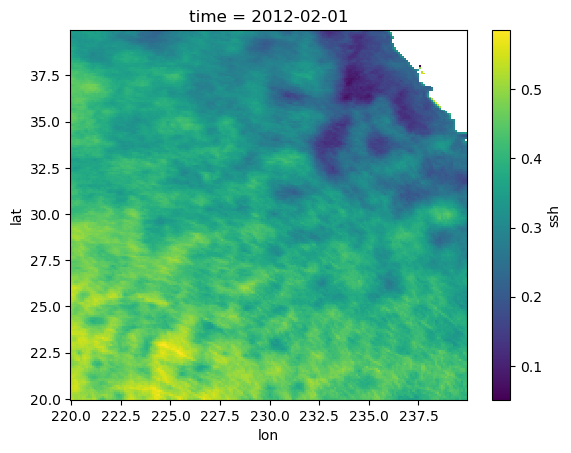

In [13]:
Diag.exp.ssh[0].plot()

In [8]:
Diag.regrid_exp()

In [9]:
Diag.rmse_based_scores()

In [10]:
Diag.movie(framerate=12)

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/fleguillou/anaconda3/envs/env-plot --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

In [11]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))